<a href="https://colab.research.google.com/github/Moshiur-rahman74/Data-Mining-And-Machine-Learning-DMML-/blob/main/DMML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title:"Credit‑Risk Scoring with Explainable AI"

In [ ]:
!pip install kagglehub --quiet

import kagglehub

# Download the dataset
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Dataset downloaded to:", path)


100%|██████████| 368k/368k [00:00<00:00, 1.01MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [ ]:
import pandas as pd
import os

# Load the dataset file
file_path = os.path.join(path, "credit_risk_dataset.csv")
df = pd.read_csv(file_path)

# Show data
print(df.head())
print("\n Data Info:\n", df.info())
print("\n Missing Values:\n", df.isnull().sum())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop rows with missing values (simplest method)
df.dropna(inplace=True)

# Encode categorical features
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Performance
print("\n Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\n Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6715
           1       0.71      0.45      0.55      1877

    accuracy                           0.84      8592
   macro avg       0.79      0.70      0.73      8592
weighted avg       0.83      0.84      0.83      8592

Accuracy: 0.8405493482309124

 Random Forest Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      6715
           1       0.96      0.69      0.80      1877

    accuracy                           0.93      8592
   macro avg       0.94      0.84      0.88      8592
weighted avg       0.93      0.93      0.92      8592

Accuracy: 0.9264432029795159


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, dl_accuracy = model.evaluate(X_test, y_test)
print("\n Deep Learning Accuracy:", dl_accuracy)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8149 - loss: 0.4336 - val_accuracy: 0.8606 - val_loss: 0.3533
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8680 - loss: 0.3302 - val_accuracy: 0.8638 - val_loss: 0.3413
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8742 - loss: 0.3194 - val_accuracy: 0.8633 - val_loss: 0.3337
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8764 - loss: 0.3130 - val_accuracy: 0.8756 - val_loss: 0.3256
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8822 - loss: 0.3039 - val_accuracy: 0.8783 - val_loss: 0.3201
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8865 - loss: 0.2969 - val_accuracy: 0.8791 - val_loss: 0.3110
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8837 - loss: 0.2945 - val_accuracy: 0.8763 - val_loss: 0.3092
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8915 - loss: 0.2811 - val_accuracy: 0.8828 - val_

In [ ]:
print("\n Final Model Accuracy Summary:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Random Forest      : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Deep Learning (Keras): {dl_accuracy:.4f}")


 Final Model Accuracy Summary:
Logistic Regression: 0.8405
Random Forest      : 0.9264
Deep Learning (Keras): 0.8822


## Visualized the performance of different models (Logistic Regression, Random Forest, and Deep Learning) using bar plots for accuracy, confusion matrices, and ROC curves.

In [ ]:
# Create a dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Deep Learning': dl_accuracy
}

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])

# Rename the index to 'Model'
accuracy_df.index.name = 'Model'

# Reset index to make 'Model' a column
accuracy_df = accuracy_df.reset_index()

display(accuracy_df)

,Model,Accuracy
0,Logistic Regression,0.840549
1,Random Forest,0.926443
2,Deep Learning,0.882216


## Visualized model accuracy

### Subtask:
Created a bar plot to compare the accuracy of the Logistic Regression, Random Forest, and Deep Learning models.


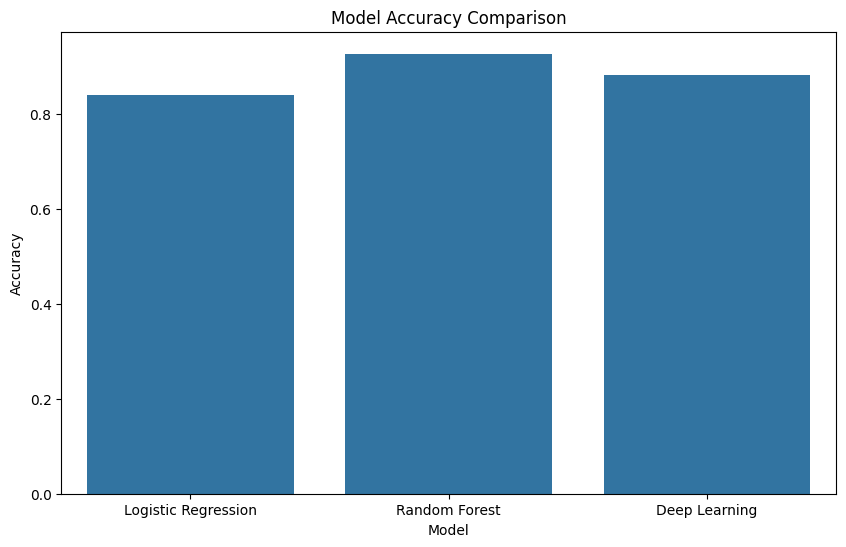

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title("Model Accuracy Comparison")
plt.show()

## Visualized confusion matrices

### Subtask:
Generated confusion matrices for each model to assess their performance in more detail.


269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


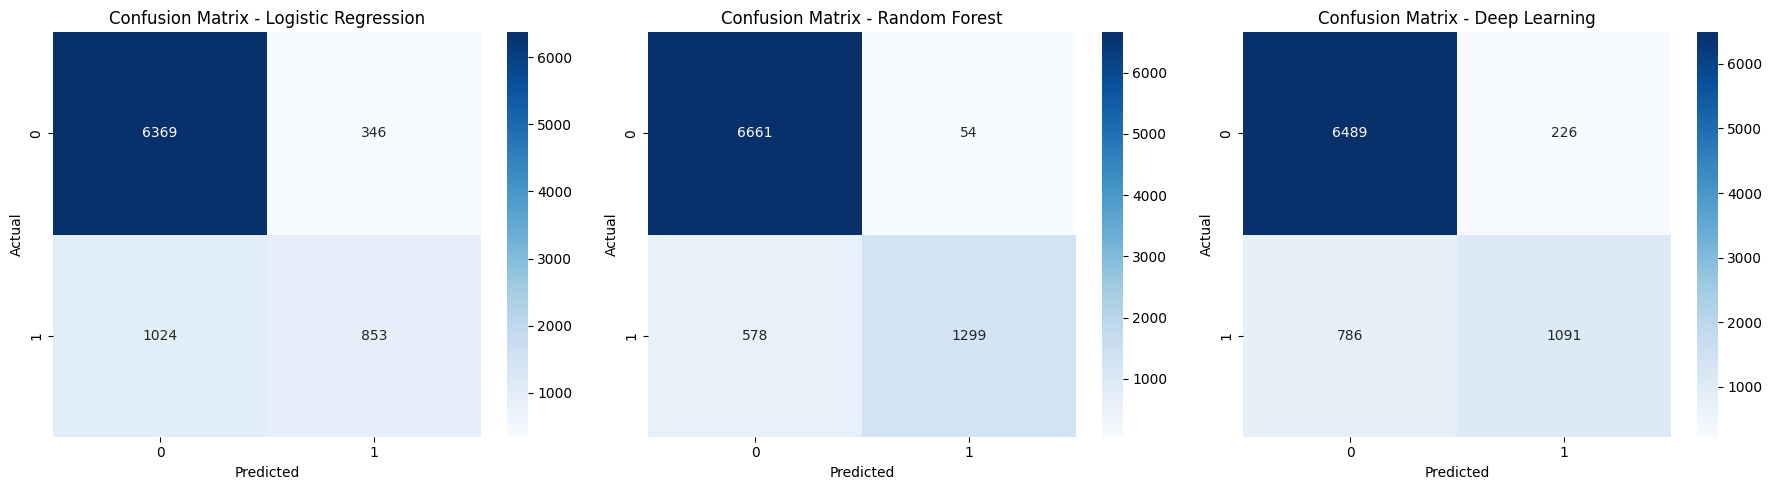

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# For Deep Learning, convert probabilities to class labels
y_pred_dl_classes = (model.predict(X_test) > 0.5).astype("int32")
cm_dl = confusion_matrix(y_test, y_pred_dl_classes)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("Confusion Matrix - Deep Learning")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Visualized roc curves

### Subtask:
Ploted ROC curves for each model to evaluate their ability to distinguish between the two classes.


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


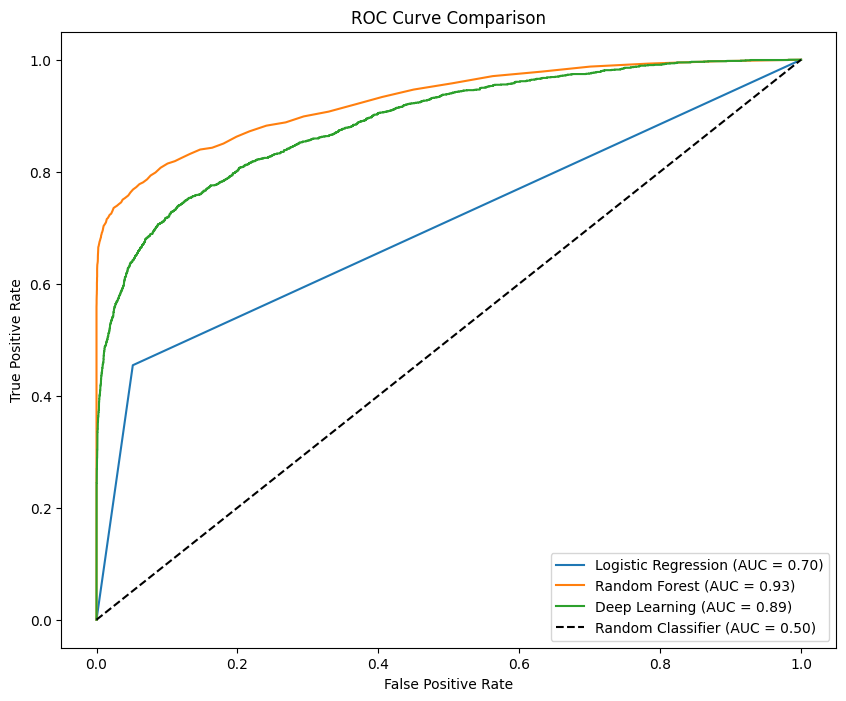

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

# Calculate ROC curve and AUC for Random Forest
# Get predicted probabilities for the positive class (index 1)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Calculate ROC curve and AUC for Deep Learning
# Get predicted probabilities from the Keras model
y_pred_proba_dl = model.predict(X_test).ravel()
fpr_dl, tpr_dl, thresholds_dl = roc_curve(y_test, y_pred_proba_dl)
auc_dl = roc_auc_score(y_test, y_pred_proba_dl)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {auc_dl:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A bar plot comparing the accuracy of Logistic Regression, Random Forest, and Deep Learning models was successfully generated.
*   Confusion matrices for each model were calculated and visualized as heatmaps, showing the distribution of true positives, true negatives, false positives, and false negatives.
*   ROC curves for all three models were plotted on a single figure, along with their respective AUC scores, to compare their ability to distinguish between classes.

### Insights or Next Steps

*   Analyze the confusion matrices to understand the specific types of errors (false positives and false negatives) each model makes.
*   Compare the AUC scores from the ROC curves to quantitatively assess which model performs best in terms of distinguishing between classes across various thresholds.
